In [514]:
import pandas as pd
df_train=pd.read_csv('train_data1.csv')
#print(df_train.head())
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
%matplotlib inline

In [515]:
print(df_train['critic_rating1'].describe())
print(df_train['critic_rating2'].describe())
print(df_train['user_rating1'].describe())
print(df_train['user_rating2'].describe())

count    138.000000
mean      55.637681
std       15.011403
min       11.000000
25%       46.250000
50%       56.000000
75%       66.750000
max       99.000000
Name: critic_rating1, dtype: float64
count    138.000000
mean      58.456522
std       25.518884
min        7.000000
25%       36.000000
50%       61.000000
75%       79.750000
max      100.000000
Name: critic_rating2, dtype: float64
count    138.000000
mean       6.353623
std        1.230818
min        2.000000
25%        5.625000
50%        6.500000
75%        7.175000
max        8.700000
Name: user_rating1, dtype: float64
count    138.000000
mean      58.731884
std       18.621289
min       13.000000
25%       44.000000
50%       57.500000
75%       76.000000
max       93.000000
Name: user_rating2, dtype: float64


In [516]:
#To see how things are working let's see our correlation map
correlation = df_train.corr()
print(correlation)

                critic_rating1  user_rating1  critic_rating2  user_rating2
critic_rating1        1.000000      0.612495        0.914420      0.641103
user_rating1          0.612495      1.000000        0.609038      0.684016
critic_rating2        0.914420      0.609038        1.000000      0.710841
user_rating2          0.641103      0.684016        0.710841      1.000000


In [517]:
a = pd.read_csv("train_data.csv")
b = pd.read_csv("train_data1.csv")
merged = a.merge(b, on='Movie_Name')
merged.to_csv("output.csv", index=False)


In [518]:
data = pd.read_csv("output.csv")
data['ww_gross'].fillna(data['ww_gross'].min(),inplace=True)
data['d_gross'].fillna(data['d_gross'].min(),inplace=True)
data['user_rating1']=(data['user_rating1']*10)
print(data)

     Movie_rating                                         Movie_Name  \
0              99                                         Moonlight    
1              96                             Manchester by the Sea    
2              93                                        La La Land    
3              92                                             Tower    
4              81                                           Arrival    
5              77                                   The Jungle Book    
6              77                             The Edge of Seventeen    
7              74                                             Sully    
8              73                                         From Afar    
9              73                                    Eye in the Sky    
10             72  The Beatles: Eight Days a Week - The Touring Y...   
11             72                                    Doctor Strange    
12             74                         In Order of Disappeara

In [519]:
#data.to_csv('output1.csv', encoding='utf-8')

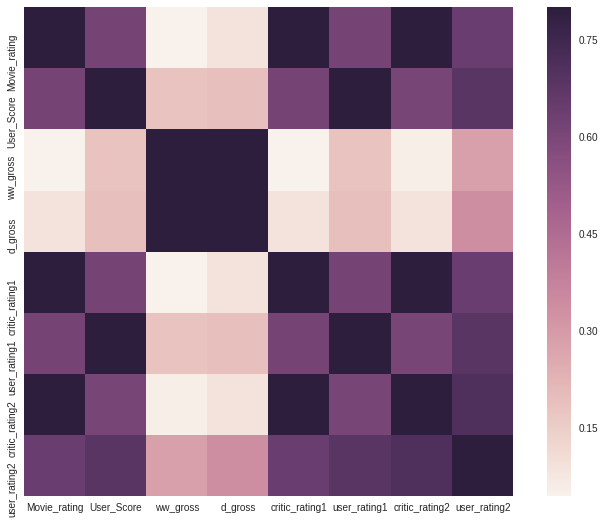

In [520]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

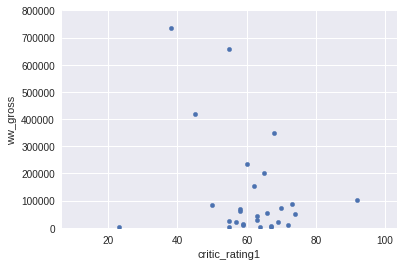

In [521]:
df_train=pd.read_csv('Box_office_OverallData.csv')
var = 'critic_rating1'
data = pd.concat([df_train['ww_gross'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='ww_gross', ylim=(0,800000))

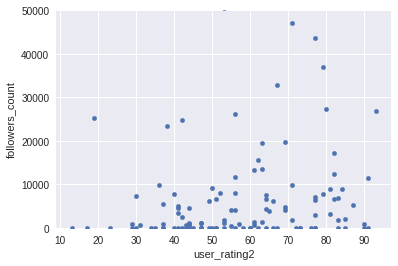

In [522]:
var = 'user_rating2'
data = pd.concat([df_train['followers_count'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='followers_count', ylim=(0,50000))

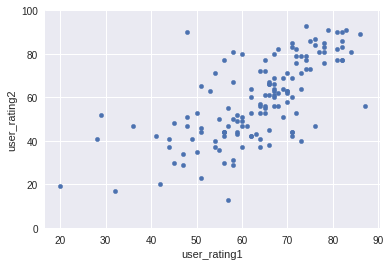

In [523]:
var = 'user_rating1'
data = pd.concat([df_train['user_rating2'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='user_rating2', ylim=(0,100))

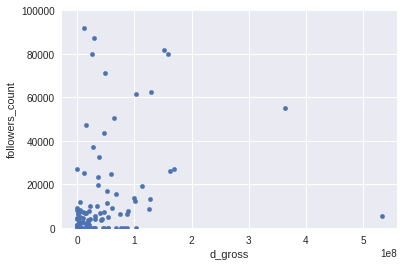

In [524]:
var = 'd_gross'
data = pd.concat([df_train['followers_count'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='followers_count', ylim=(0,100000))

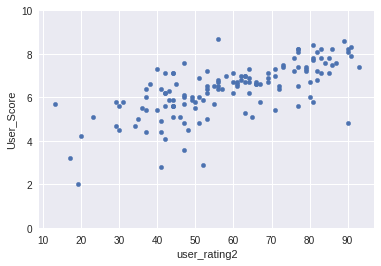

In [525]:
var = 'user_rating2'
data = pd.concat([df_train['User_Score'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='User_Score', ylim=(0,10))

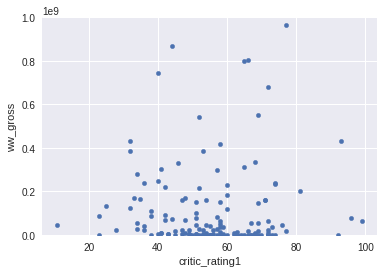

In [526]:
var = 'critic_rating1'
data = pd.concat([df_train['ww_gross'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='ww_gross', ylim=(0,1000000000))

In [527]:
print("Skewness: %f" % df_train['User_Score'].skew())
print("Kurtosis: %f" % df_train['User_Score'].kurt())

print("Skewness of gross: %f" % df_train['ww_gross'].skew())
print("Kurtosis of gross: %f" % df_train['ww_gross'].kurt())

Skewness: -0.736666
Kurtosis: 0.932122
Skewness of gross: 2.531678
Kurtosis of gross: 6.590991


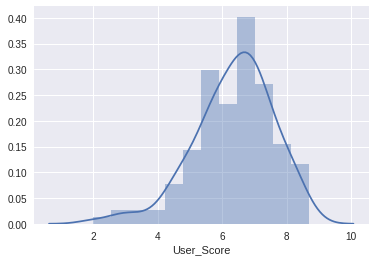

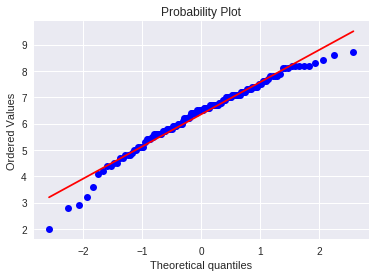

In [528]:
sns.distplot(df_train['User_Score'])
fig = plt.figure()
res = stats.probplot(df_train['User_Score'], plot=plt)

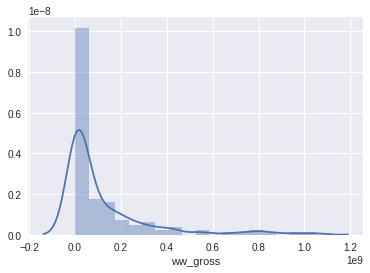

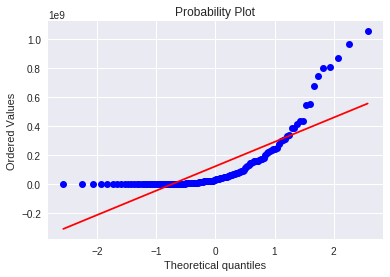

In [529]:
sns.distplot(df_train['ww_gross'])
fig = plt.figure()
res = stats.probplot(df_train['ww_gross'], plot=plt)

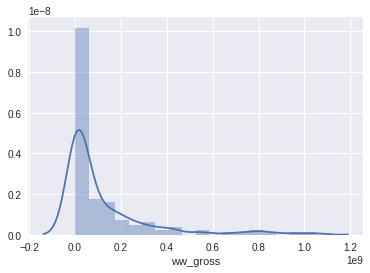

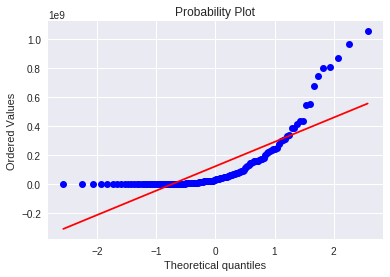

In [530]:
#df_train['ww_gross'] = np.log(df_train['ww_gross'])
sns.distplot(df_train['ww_gross'])
fig = plt.figure()
res = stats.probplot(df_train['ww_gross'], plot=plt)

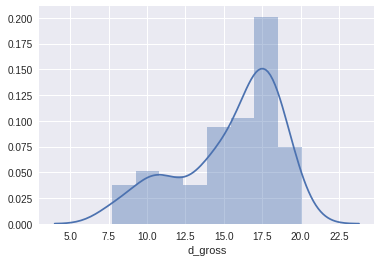

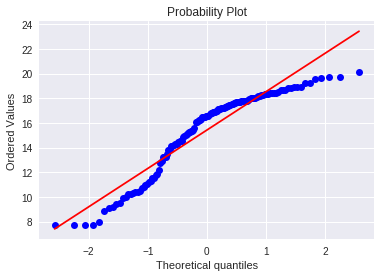

In [531]:
df_train['d_gross'] = np.log(df_train['d_gross'])
sns.distplot(df_train['d_gross'])
fig = plt.figure()
res = stats.probplot(df_train['d_gross'], plot=plt)

In [532]:
df_train.dtypes

Movie_Name          object
Movie_rating         int64
User_Score         float64
Genre               object
ww_gross             int64
d_gross            float64
critic_rating1       int64
user_rating1         int64
critic_rating2       int64
user_rating2         int64
twitter_handles     object
followers_count      int64
dtype: object

In [533]:
del df_train['twitter_handles']

In [534]:
from sklearn import preprocessing
df_train['Genre'].fillna(np.nan,inplace=True)
lbl=preprocessing.LabelEncoder()
lbl.fit(list(df_train['Genre'].values))
df_train['Genre']=lbl.transform(list(df_train['Genre'].values))

In [535]:
df_train.dtypes

Movie_Name          object
Movie_rating         int64
User_Score         float64
Genre                int64
ww_gross             int64
d_gross            float64
critic_rating1       int64
user_rating1         int64
critic_rating2       int64
user_rating2         int64
followers_count      int64
dtype: object

In [536]:
#del df_train['Movie_Name']
#del df_train['d_gross']
del df_train['Genre']
#df_train.to_csv('output1.csv', encoding='utf-8')

In [537]:
a = pd.read_csv("output1.csv")
b = pd.read_csv("train_data4.csv")
merged = a.merge(b, on='Movie_Name')
merged.to_csv("final.csv", index=False)

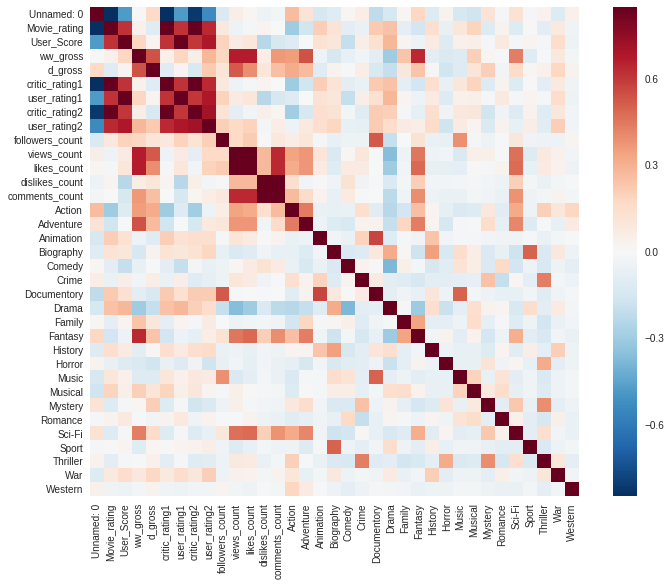

In [538]:
df_train=pd.read_csv('final.csv')
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

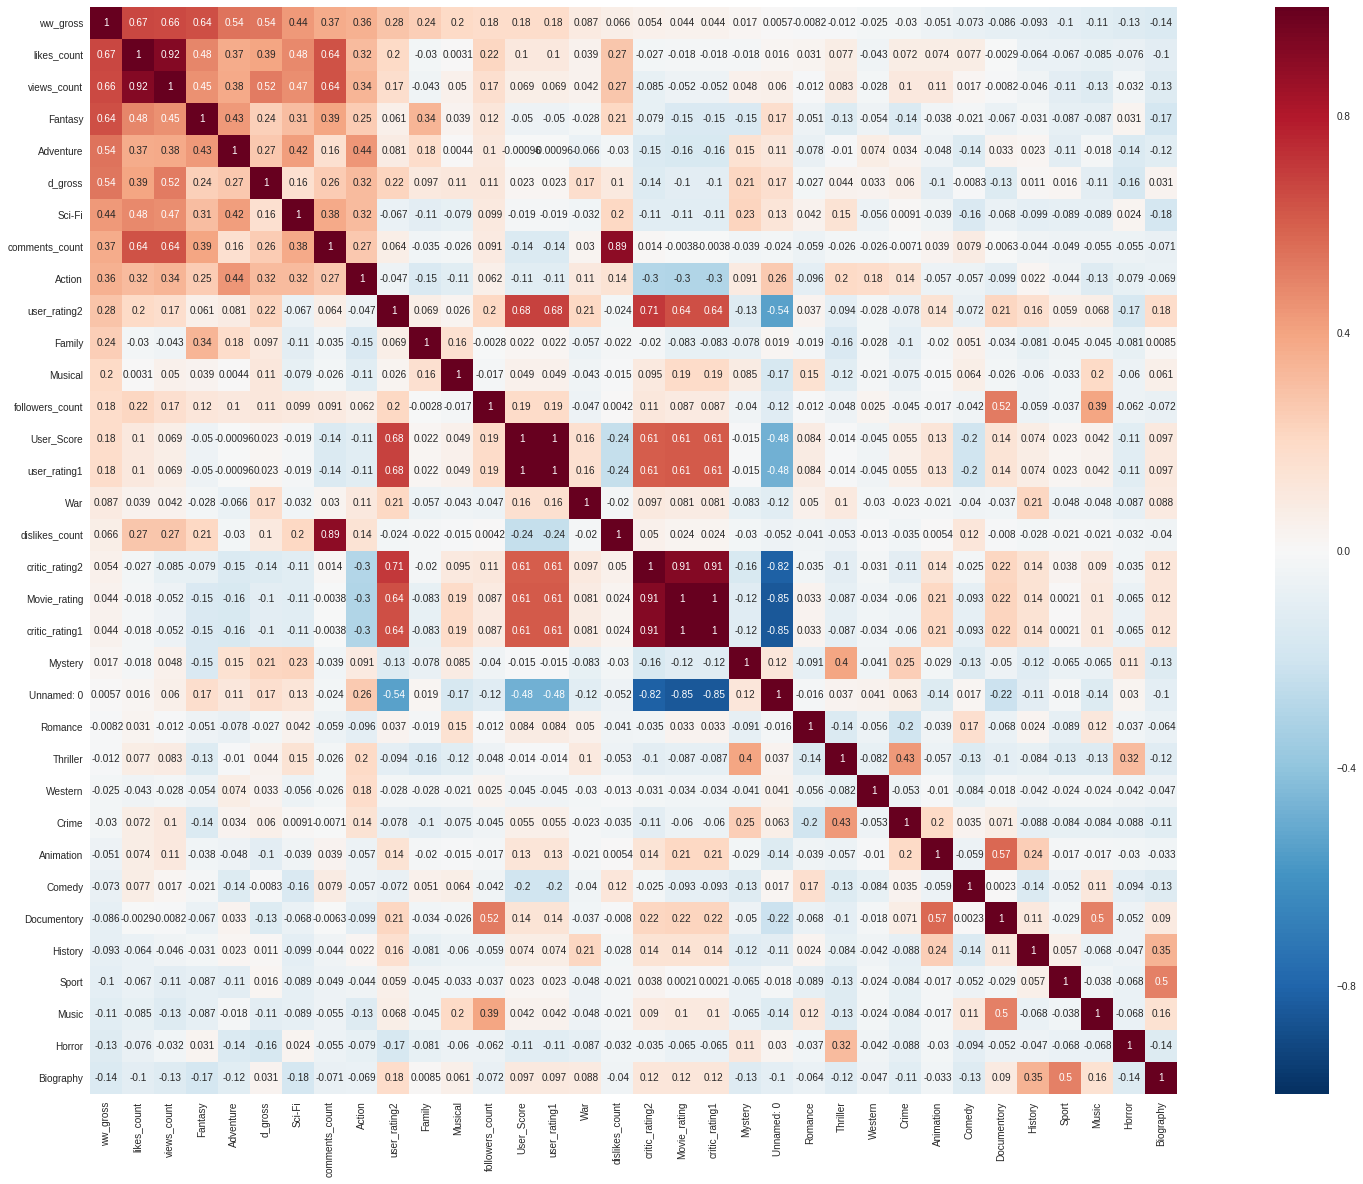

In [539]:
#saleprice correlation matrix
k = 35 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ww_gross')['ww_gross'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(35,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.show()

In [540]:
print(df_train.dtypes)
del df_train['Movie_Name']
del df_train['Unnamed: 0']

Unnamed: 0           int64
Movie_Name          object
Movie_rating         int64
User_Score         float64
ww_gross             int64
d_gross            float64
critic_rating1       int64
user_rating1         int64
critic_rating2       int64
user_rating2         int64
followers_count      int64
views_count          int64
likes_count          int64
dislikes_count       int64
comments_count       int64
Action               int64
Adventure            int64
Animation            int64
Biography            int64
Comedy               int64
Crime                int64
Documentory          int64
Drama                int64
Family               int64
Fantasy              int64
History              int64
Horror               int64
Music                int64
Musical              int64
Mystery              int64
Romance              int64
Sci-Fi               int64
Sport                int64
Thriller             int64
War                  int64
Western              int64
dtype: object


In [541]:
from sklearn.model_selection import train_test_split
data=df_train
y=df_train['ww_gross']
X=data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(n_estimators=4000,learning_rate=0.1,max_depth=7)

reg1.fit(X_train,y_train)
prediction1 = reg1.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(prediction1, y_test))
print(prediction1)


0.976820128193
[  8.34645880e+04   2.61908297e+03   4.20573892e+05   4.52039951e+07
   1.81263203e+06   1.44487645e+08   3.99744979e+08   1.72222887e+08
   2.53060264e+07   1.68893499e+07   2.10129161e+08   1.05181716e+07
   1.69799733e+07   2.28394686e+07   7.84110517e+07   9.80025633e+06
   1.67000719e+06   1.70258147e+07   1.69203502e+08   1.13674053e+04
   8.61367252e+08   2.39544312e+07   1.72111431e+08   1.90365438e+06
   3.39390096e+07   1.63626610e+08   2.01823156e+05   3.13543119e+08]
